# Import and clean the dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('drug_consumption.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [3]:
df.shape

(1885, 32)

In [4]:
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [5]:
print(f"Missing values: \n {df.isnull().sum()}")
print()
print(f"Duplicated values: \n {df.duplicated().sum()}")

Missing values: 
 ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

Duplicated values: 
 0


In [6]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


## Data Transformation

In [7]:
age = {
          -0.95197: '18-24',
          -0.07854: '25 - 34',
          0.49788: '35 - 44',
          1.09449: '45 - 54',
          1.82213: '55 - 64',
          2.59171: '65+'
          }

gender = {
            0.48246: 'Female',
            -0.48246: 'Male'
            }

education = {
            -2.43591: 'Left School Before 16 years',
            -1.73790: 'Left School at 16 years',
            -1.43719: 'Left School at 17 years',
            -1.22751: 'Left School at 18 years',
            -0.61113: 'Some College,No Certificate Or Degree',
            -0.05921: 'Professional Certificate/ Diploma',
            0.45468: 'University Degree',
            1.16365: 'Masters Degree',
            1.98437: 'Doctorate Degree',
            }

country = {
            -0.09765: 'Australia',
            0.24923: 'Canada',
            -0.46841: 'New Zealand',
            -0.28519: 'Other',
            0.21128: 'Republic of Ireland',
            0.96082: 'UK',
            -0.57009: 'USA'
            }

ethnicity = {
            -0.50212: 'Asian',
            -1.10702: 'Black',
            1.90725: 'Mixed-Black/Asian',
            0.12600: 'Mixed-White/Asian',
            -0.22166: 'Mixed-White/Black',
            0.11440: 'Other',
            -0.31685: 'White'
            }

usage = {
    'CL0': 'Never Used',
    'CL1': 'Used over a Decade Ago',
    'CL2': 'Used in Last Decade',
    'CL3': 'Used in Last Year',
    'CL4': 'Used in Last Month',
    'CL5': 'Used in Last Week',
    'CL6': 'Used in Last Day',
    }

In [8]:
df['Age'] = df['Age'].replace(age)
df['Gender'] = df['Gender'].replace(gender)
df['Education'] = df['Education'].replace(education)
df['Country'] = df['Country'].replace(country)
df['Ethnicity'] = df['Ethnicity'].replace(ethnicity)
df['Alcohol'] = df['Alcohol'].replace(usage)
df['Amphet'] = df['Amphet'].replace(usage)
df['Amyl'] = df['Amyl'].replace(usage)
df['Benzos'] = df['Benzos'].replace(usage)
df['Caff'] = df['Caff'].replace(usage)
df['Cannabis'] = df['Cannabis'].replace(usage)
df['Choc'] = df['Choc'].replace(usage)
df['Coke'] = df['Coke'].replace(usage)
df['Crack'] = df['Crack'].replace(usage)
df['Ecstasy'] = df['Ecstasy'].replace(usage)
df['Heroin'] = df['Heroin'].replace(usage)
df['Ketamine'] = df['Ketamine'].replace(usage)
df['Legalh'] = df['Legalh'].replace(usage)
df['LSD'] = df['LSD'].replace(usage)
df['Meth'] = df['Meth'].replace(usage)
df['Mushrooms'] = df['Mushrooms'].replace(usage)
df['Nicotine'] = df['Nicotine'].replace(usage)
df['Semer'] = df['Semer'].replace(usage)
df['VSA'] = df['VSA'].replace(usage)

In [9]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,2,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,5,35 - 44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


# Data Visualization

In [10]:
num_cols = df.select_dtypes(include=['float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

## Psych Visualizations

### Histogram

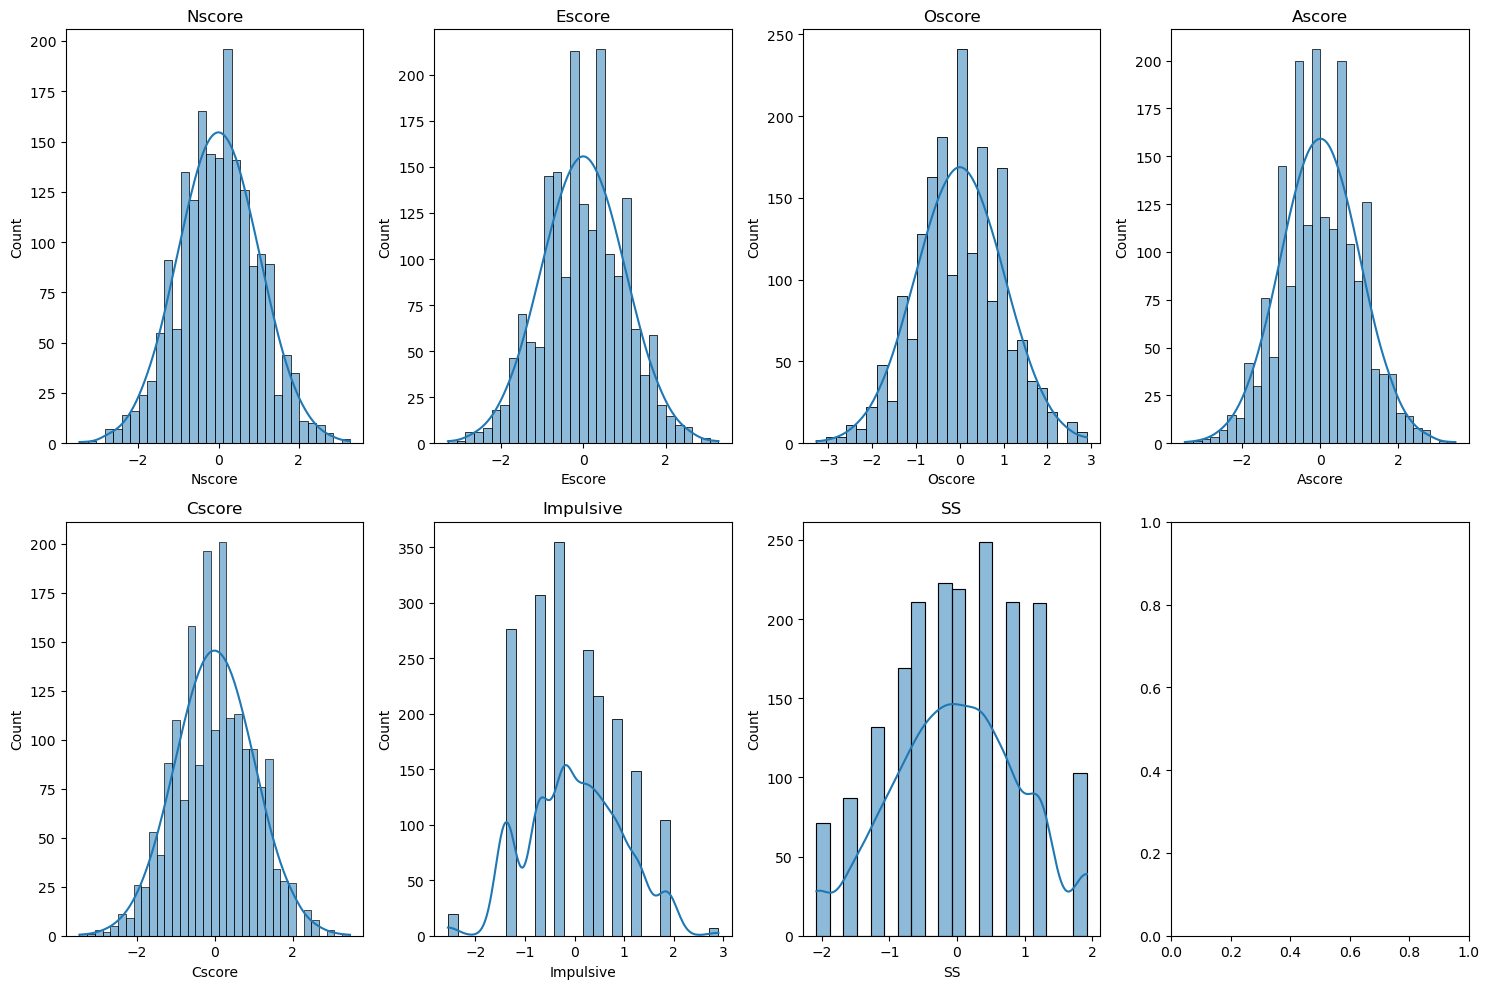

In [11]:
f, ax = plt.subplots(2,4 , figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data = df, x = cols , ax= ax[index], kde=True)
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()

### Boxplot

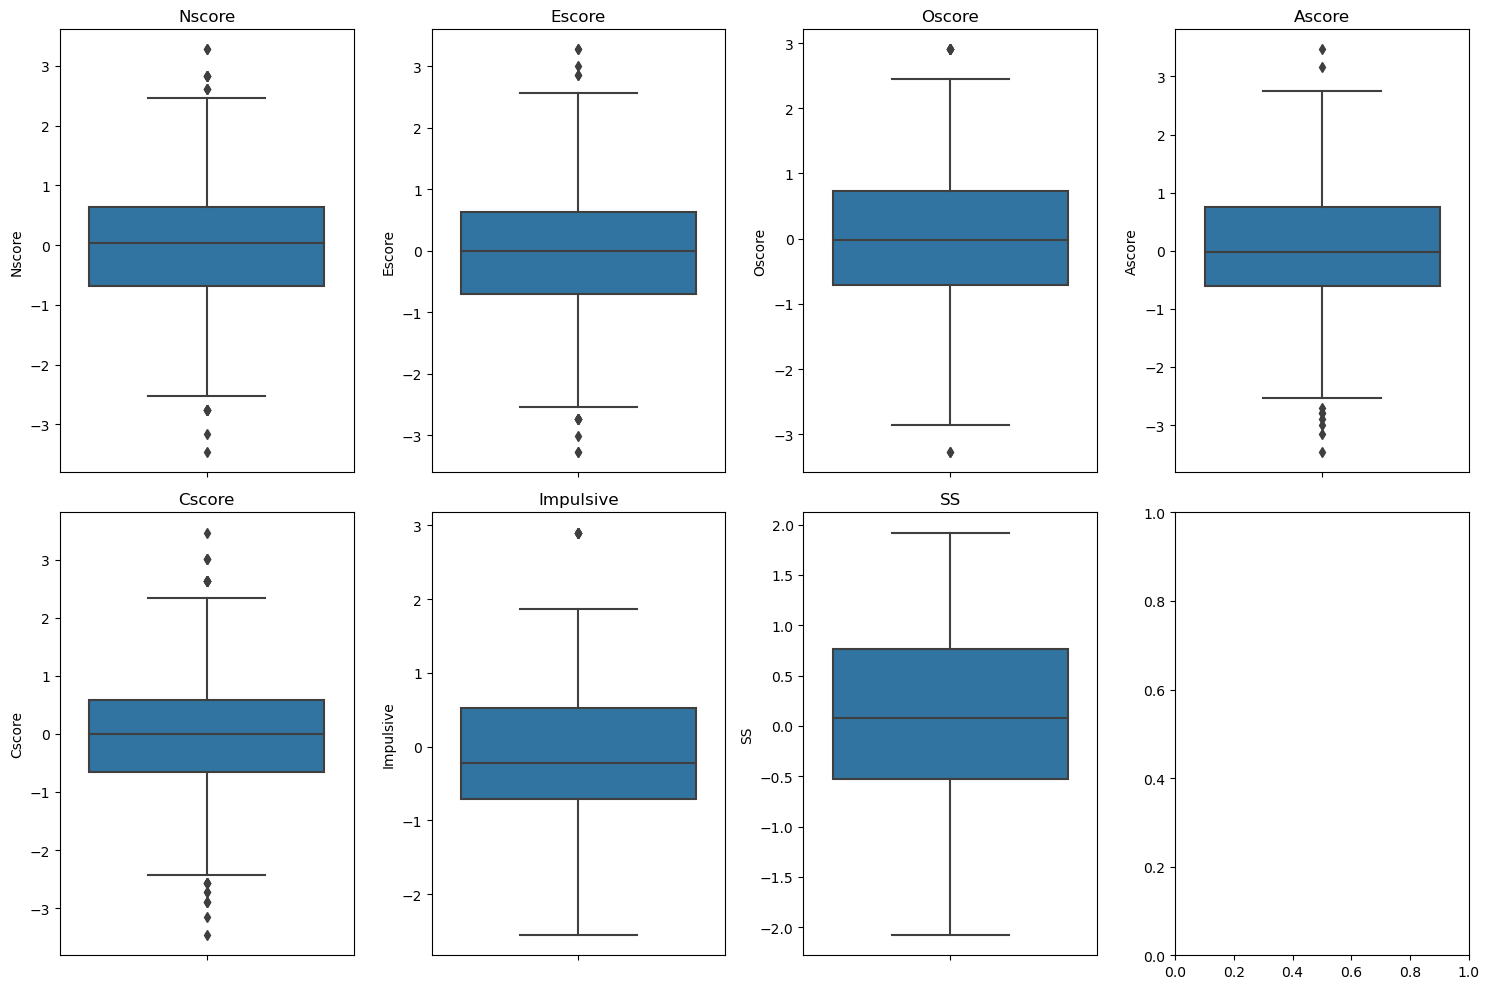

In [12]:
f, ax= plt.subplots(2,4 , figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(data = df, y = cols , ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()

### Heatmap Correlation

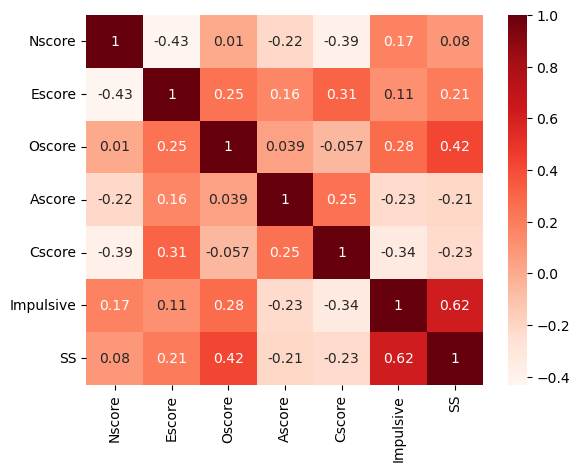

In [13]:
sns.heatmap(df[num_cols].corr(),annot=True, cmap='Reds')
plt.show()

## Drug Visualizations

In [14]:
comps = ['Age', 'Gender']
drugs = ['Alcohol', 'Cannabis', 'Choc', 'Coke', 'Caff', 'Nicotine', 'Semer']

for drug in drugs:
    for comp in comps:
        relation = df.groupby([comp,drug]).size().reset_index(name='count')
        fig = px.bar(relation, y= 'count', x = comp , color = drug, barmode = 'group', title = f"{drug} use by {comp}", text_auto = True)
        fig.show()

# Modeling

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Define Custom Scoring Functions

In [16]:
def sensitivity_specificity_sum(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    sensitivities = []
    specificities = []
    
    for class_label in range(num_classes):
        true_positive = np.sum((y_true == class_label) & (y_pred == class_label))
        false_negative = np.sum((y_true == class_label) & (y_pred != class_label))
        false_positive = np.sum((y_true != class_label) & (y_pred == class_label))
        true_negative = np.sum((y_true != class_label) & (y_pred != class_label))
        
        sensitivity = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        
        sensitivities.append(sensitivity)
        specificities.append(specificity)
    
    mean_sensitivity = np.mean(sensitivities)
    mean_specificity = np.mean(specificities)
    
    return (mean_sensitivity + mean_specificity) * 100



# Use make_scorer to create a scorer object
custom_scorer = make_scorer(sensitivity_specificity_sum)

## Preprocessing

In [17]:
df = df.drop('ID', axis = 1)

In [18]:
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [19]:
features = ['Age', 'Gender', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
targets = ['Alcohol', 'Cannabis', 'Choc', 'Coke', 'Caff', 'Nicotine', 'Semer']

In [20]:
X = df[features]
y = df[targets]

In [21]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.05, shuffle = True)


xScaler = StandardScaler()
xColNames = xTrain.columns.values.tolist()

xTrainScaled = xScaler.fit_transform(xTrain[xColNames])

## Optimize Hyperparameters

## Logistic Regression Hyperparameter Optimization

In [22]:
parameters = [{"fit_intercept": [True, False],
              "solver" : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}]

logParams = {}
for target in targets:
    grid_search = GridSearchCV(estimator=LogisticRegression(),  
                               param_grid=parameters,
                               scoring=custom_scorer,
                               cv=5,
                               verbose=0)
    grid_search.fit(xTrainScaled, yTrain[target])
    logParams[target] = grid_search.best_params_

logParams

{'Alcohol': {'fit_intercept': False, 'solver': 'lbfgs'},
 'Cannabis': {'fit_intercept': False, 'solver': 'lbfgs'},
 'Choc': {'fit_intercept': False, 'solver': 'liblinear'},
 'Coke': {'fit_intercept': False, 'solver': 'liblinear'},
 'Caff': {'fit_intercept': False, 'solver': 'liblinear'},
 'Nicotine': {'fit_intercept': False, 'solver': 'lbfgs'},
 'Semer': {'fit_intercept': False, 'solver': 'liblinear'}}

## Decision Tree Classifier Hyperparameter Optimization

In [23]:
parameters = [{"criterion": ['gini', 'entropy', 'log_loss'],
              "splitter" : ['best', 'random'],
              'max_depth': [10, 20, 30, 40, 50],
              'min_samples_split': [2, 5, 8],
              'min_samples_leaf': [1, 2, 3],
              'max_features': [None, 'sqrt', 'log2']}]

dtParams = {}
for target in targets:
    gridSearch = GridSearchCV(estimator = DecisionTreeClassifier(),  
                            param_grid = parameters,
                            scoring = custom_scorer,
                            cv = 5,
                            verbose=0)


    gridSearch.fit(xTrainScaled, yTrain[target]) 

    dtParams[target] = gridSearch.best_params_

dtParams

{'Alcohol': {'criterion': 'gini',
  'max_depth': 20,
  'max_features': 'log2',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'splitter': 'random'},
 'Cannabis': {'criterion': 'gini',
  'max_depth': 10,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 8,
  'splitter': 'best'},
 'Choc': {'criterion': 'gini',
  'max_depth': 30,
  'max_features': None,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'splitter': 'random'},
 'Coke': {'criterion': 'gini',
  'max_depth': 50,
  'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'min_samples_split': 8,
  'splitter': 'best'},
 'Caff': {'criterion': 'gini',
  'max_depth': 50,
  'max_features': None,
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'splitter': 'best'},
 'Nicotine': {'criterion': 'gini',
  'max_depth': 50,
  'max_features': None,
  'min_samples_leaf': 3,
  'min_samples_split': 8,
  'splitter': 'random'},
 'Semer': {'criterion': 'entropy',
  'max_depth': 20,
  'max_features': 'log2',
  'min_sa

## Random Forest Classifier Hyperparameter Optimization

In [24]:
parameters = [{"criterion": ['gini', 'entropy'],
              'max_depth': [10, 20, 30],
              'min_samples_split': [2, 5, 8],
              'min_samples_leaf': [1, 2, 3]}]

rfParams = {}
for target in targets:
    gridSearch = GridSearchCV(estimator = RandomForestClassifier(),  
                            param_grid = parameters,
                            scoring = custom_scorer,
                            cv = 5,
                            verbose=0)


    gridSearch.fit(xTrainScaled, yTrain[target]) 

    rfParams[target] = gridSearch.best_params_

rfParams

{'Alcohol': {'criterion': 'entropy',
  'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 'Cannabis': {'criterion': 'gini',
  'max_depth': 30,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 'Choc': {'criterion': 'entropy',
  'max_depth': 30,
  'min_samples_leaf': 1,
  'min_samples_split': 8},
 'Coke': {'criterion': 'gini',
  'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 'Caff': {'criterion': 'gini',
  'max_depth': 20,
  'min_samples_leaf': 3,
  'min_samples_split': 2},
 'Nicotine': {'criterion': 'gini',
  'max_depth': 20,
  'min_samples_leaf': 2,
  'min_samples_split': 5},
 'Semer': {'criterion': 'gini',
  'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 2}}

## Neural Network Hyperparameter Optimization

In [25]:
parameters = parameter_space = {
    'max_iter': [200],
    'hidden_layer_sizes': [(25,25), (10,10,10)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['invscaling', 'adaptive'],
}

nnParams = {}
for target in targets:
    gridSearch = GridSearchCV(estimator = MLPClassifier(),  
                            param_grid = parameters,
                            scoring = custom_scorer,
                            cv = 5,
                            verbose=0)


    gridSearch.fit(xTrainScaled, yTrain[target]) 

    nnParams[target] = gridSearch.best_params_

nnParams

{'Alcohol': {'activation': 'relu',
  'hidden_layer_sizes': (25, 25),
  'learning_rate': 'adaptive',
  'max_iter': 200,
  'solver': 'adam'},
 'Cannabis': {'activation': 'relu',
  'hidden_layer_sizes': (25, 25),
  'learning_rate': 'invscaling',
  'max_iter': 200,
  'solver': 'adam'},
 'Choc': {'activation': 'relu',
  'hidden_layer_sizes': (25, 25),
  'learning_rate': 'invscaling',
  'max_iter': 200,
  'solver': 'sgd'},
 'Coke': {'activation': 'relu',
  'hidden_layer_sizes': (25, 25),
  'learning_rate': 'adaptive',
  'max_iter': 200,
  'solver': 'adam'},
 'Caff': {'activation': 'relu',
  'hidden_layer_sizes': (10, 10, 10),
  'learning_rate': 'invscaling',
  'max_iter': 200,
  'solver': 'sgd'},
 'Nicotine': {'activation': 'relu',
  'hidden_layer_sizes': (25, 25),
  'learning_rate': 'invscaling',
  'max_iter': 200,
  'solver': 'adam'},
 'Semer': {'activation': 'relu',
  'hidden_layer_sizes': (10, 10, 10),
  'learning_rate': 'invscaling',
  'max_iter': 200,
  'solver': 'sgd'}}

## Support Vector Classifier Hyperparameter Optimization

In [26]:
parameters = {'C':[1,10,100],
              'gamma':[1,0.1,0.001], 
              'kernel':['linear', 'rbf']}

svcParams = {}
for target in targets:
    gridSearch = GridSearchCV(estimator = SVC(),  
                            param_grid = parameters,
                            scoring = custom_scorer,
                            cv = 5,
                            verbose=0)


    gridSearch.fit(xTrainScaled, yTrain[target]) 

    svcParams[target] = gridSearch.best_params_

svcParams

{'Alcohol': {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 'Cannabis': {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 'Choc': {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 'Coke': {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 'Caff': {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 'Nicotine': {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'},
 'Semer': {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}}

## KNN Hyperparameter Optimization

In [27]:
parameters = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knnParams = {}
for target in targets:
    gridSearch = GridSearchCV(estimator = KNeighborsClassifier(),  
                            param_grid = parameters,
                            scoring = custom_scorer,
                            cv = 5,
                            verbose=0)


    gridSearch.fit(xTrainScaled, yTrain[target]) 

    knnParams[target] = gridSearch.best_params_

knnParams

{'Alcohol': {'algorithm': 'auto',
  'leaf_size': 20,
  'metric': 'manhattan',
  'n_neighbors': 3,
  'p': 1,
  'weights': 'distance'},
 'Cannabis': {'algorithm': 'auto',
  'leaf_size': 20,
  'metric': 'euclidean',
  'n_neighbors': 10,
  'p': 1,
  'weights': 'uniform'},
 'Choc': {'algorithm': 'auto',
  'leaf_size': 20,
  'metric': 'euclidean',
  'n_neighbors': 3,
  'p': 1,
  'weights': 'distance'},
 'Coke': {'algorithm': 'auto',
  'leaf_size': 20,
  'metric': 'euclidean',
  'n_neighbors': 3,
  'p': 1,
  'weights': 'distance'},
 'Caff': {'algorithm': 'auto',
  'leaf_size': 20,
  'metric': 'manhattan',
  'n_neighbors': 3,
  'p': 1,
  'weights': 'distance'},
 'Nicotine': {'algorithm': 'auto',
  'leaf_size': 20,
  'metric': 'manhattan',
  'n_neighbors': 10,
  'p': 1,
  'weights': 'distance'},
 'Semer': {'algorithm': 'auto',
  'leaf_size': 20,
  'metric': 'euclidean',
  'n_neighbors': 3,
  'p': 1,
  'weights': 'uniform'}}

## Train Models

In [28]:
def HPmodel(params, model):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    for target in targets:
        sensitivity_specificity_sum_scores = []

        print(f"{target:} \n")

        for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):
            trainIndex = trainIndex.tolist()
            valIndex = valIndex.tolist()
            
            xLocalTrain, xVal = xTrain.iloc[trainIndex], xTrain.iloc[valIndex]
            yLocalTrain, yVal = yTrain[target].iloc[trainIndex], yTrain[target].iloc[valIndex]

            xScaler = StandardScaler()
            xColNames = xLocalTrain.columns.values.tolist()
            xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
            xValScaled = xScaler.transform(xVal[xColNames])

            clf = model(**params[target])
            clf.fit(xTrainScaled, yLocalTrain)
            
            yPred = clf.predict(xValScaled)

            sensitivity_specificity_sum_score = sensitivity_specificity_sum(yVal, yPred)
            sensitivity_specificity_sum_scores.append(sensitivity_specificity_sum_score)

        mean_sum_score = sum(sensitivity_specificity_sum_scores) / len(sensitivity_specificity_sum_scores)
        print("Mean sum score:", mean_sum_score)


In [29]:
# Logistic Regression
print("Optimizing hyperparameters for Logistic Regression...")
HPmodel(logParams, LogisticRegression)

Optimizing hyperparameters for Logistic Regression...
Alcohol 

Mean sum score: 106.00219657638054
Cannabis 

Mean sum score: 116.28989167460668
Choc 

Mean sum score: 102.2619209872463
Coke 

Mean sum score: 114.07070260575463
Caff 

Mean sum score: 103.65324355808994
Nicotine 

Mean sum score: 111.20984376265487
Semer 

Mean sum score: 101.06121425673112


In [30]:
# Decision Tree Classifier
print("Optimizing hyperparameters for Decision Tree Classifier...")
HPmodel(dtParams, DecisionTreeClassifier)

Optimizing hyperparameters for Decision Tree Classifier...
Alcohol 

Mean sum score: 100.66703564900992
Cannabis 

Mean sum score: 112.99190874388853
Choc 

Mean sum score: 104.79725662833941
Coke 

Mean sum score: 105.25061963178746
Caff 

Mean sum score: 100.4526832447237
Nicotine 

Mean sum score: 105.81332192064181
Semer 

Mean sum score: 99.58014490712485


In [31]:
# Random Forest Classifier
print("Optimizing hyperparameters for Random Forest Classifier...")
HPmodel(rfParams, RandomForestClassifier)

Optimizing hyperparameters for Random Forest Classifier...
Alcohol 

Mean sum score: 102.04048264100334
Cannabis 

Mean sum score: 114.9077895279984
Choc 

Mean sum score: 101.03256104494888
Coke 

Mean sum score: 105.76076456705007
Caff 

Mean sum score: 100.0
Nicotine 

Mean sum score: 108.119247368416
Semer 

Mean sum score: 100.0


In [32]:
# MLP Classifier
print("Optimizing hyperparameters for MLP Classifier...")
HPmodel(nnParams, MLPClassifier)

Optimizing hyperparameters for MLP Classifier...
Alcohol 

Mean sum score: 100.80734260008305
Cannabis 

Mean sum score: 115.37481244090664
Choc 

Mean sum score: 96.6558457963994
Coke 

Mean sum score: 105.17849575615955
Caff 

Mean sum score: 99.29822635672095
Nicotine 

Mean sum score: 109.02489669343444
Semer 

Mean sum score: 103.41783640830636


In [33]:
# SVC
print("Optimizing hyperparameters for SVC...")
HPmodel(svcParams, SVC)

Optimizing hyperparameters for SVC...
Alcohol 

Mean sum score: 105.15221741573774
Cannabis 

Mean sum score: 113.96581990155289
Choc 

Mean sum score: 102.83959744859035
Coke 

Mean sum score: 108.87425438348063
Caff 

Mean sum score: 99.62233496790151
Nicotine 

Mean sum score: 108.4359667288431
Semer 

Mean sum score: 99.77591036414566


In [34]:
# KNeighbors Classifier
print("Optimizing hyperparameters for KNeighbors Classifier...")
HPmodel(knnParams, KNeighborsClassifier)

Optimizing hyperparameters for KNeighbors Classifier...
Alcohol 

Mean sum score: 104.14418786111301
Cannabis 

Mean sum score: 114.17897019620496
Choc 

Mean sum score: 105.97954492264185
Coke 

Mean sum score: 108.39633081397547
Caff 

Mean sum score: 100.23213056202516
Nicotine 

Mean sum score: 108.35757282284983
Semer 

Mean sum score: 100.0


## Retrain Best Model on Entire Dataset

In [35]:
### feature scaling
xScaler = StandardScaler()
# train the scaler and apply it to the training set
xTrainScaled = xScaler.fit_transform(xTrain[xColNames])
# apply the scaling to the testing set
xTestScaled = xScaler.transform(xTest[xColNames])

In [40]:
results = []

# Iterate over each target
for target in targets:
    # Create a binary target variable for the current target
    yTrain_target = yTrain[target]
    yTest_target = yTest[target]

    if target == "Alcohol":
        # SVC
        clf = SVC(**svcParams[target])
        clf.fit(xTrainScaled, yTrain_target)
        yPred = clf.predict(xTestScaled)
        score = sensitivity_specificity_sum(yTest_target, yPred)
        results.append({"Target": target, "Model": "SVC", "Score": score})

    elif target == "Choc":
        # MLPClassifier
        clf = MLPClassifier(**nnParams[target])
        clf.fit(xTrainScaled, yTrain_target)
        yPred = clf.predict(xTestScaled)
        score = sensitivity_specificity_sum(yTest_target, yPred)
        results.append({"Target": target, "Model": "MLPClassifier", "Score": score})

    else:
        # Logistic Regression
        clf = LogisticRegression(**logParams[target])
        clf.fit(xTrainScaled, yTrain_target)
        yPred = clf.predict(xTestScaled)
        score = sensitivity_specificity_sum(yTest_target, yPred)
        results.append({"Target": target, "Model": "LogisticRegression", "Score": score})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Print or use the results DataFrame
print("Results DataFrame:")
print(results_df)


Results DataFrame:
     Target               Model       Score
0   Alcohol                 SVC  101.475893
1  Cannabis  LogisticRegression  115.424910
2      Choc       MLPClassifier  100.038961
3      Coke  LogisticRegression  111.953723
4      Caff  LogisticRegression  107.812664
5  Nicotine  LogisticRegression  105.065238
6     Semer  LogisticRegression   99.547255
